# Guide
## Data
[[Google Drive] /Data/Initial/Step1.zip](https://drive.google.com/file/d/1LpnhjeBOoLH-QwbVOovCk-OpdpmIQAaZ/view?usp=sharing)
## Code
In [3] `base_dir` : 실제 데이터 경로로 변경 필요

---

# Purpose
`1. Book` 모델의 훈련 과정에서 정확도(Accuracy) 및 손실(Loss) 경향성 분석 & 과적합 시작 Epoch 확인

## Alternation
(compared to `1. Book`)  
Epoch = 30 → Epochs = 100

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import os

2024-11-20 14:37:34.209664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_size = (400, 400)
batch_size = 32

In [3]:
# 데이터셋 로드
from tensorflow.keras.utils import image_dataset_from_directory

# 실제 데이터의 경로로 변경 필요
base_dir = "/tf/Fixed_Data/Data_Initial/Step1"

train_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=image_size,
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=image_size,
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=image_size,
    batch_size=batch_size)

Found 1732 files belonging to 2 classes.
Found 494 files belonging to 2 classes.
Found 249 files belonging to 2 classes.


2024-11-20 14:37:35.638876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 14:37:35.642224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 14:37:35.642310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
# 모델 레이어 구성
inputs = keras.Input(shape=(400, 400, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 64)        0         
 g2D)                                                        

In [6]:
model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=['accuracy'])

### epochs 값 변경

In [7]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100)  # epochs = 30

Epoch 1/100


2024-11-20 14:37:37.125011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-20 14:37:37.376060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-20 14:37:37.376330: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6f0c5610f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-20 14:37:37.376342: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-20 14:37:37.379349: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-20 14:37:37.451409: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

55/55 [==============================] - 7s 72ms/step - loss: 0.7261 - accuracy: 0.5733 - val_loss: 0.8269 - val_accuracy: 0.6093
Epoch 2/100
55/55 [==============================] - 4s 64ms/step - loss: 0.6875 - accuracy: 0.6443 - val_loss: 0.7089 - val_accuracy: 0.5567
Epoch 3/100
55/55 [==============================] - 4s 63ms/step - loss: 0.5339 - accuracy: 0.7564 - val_loss: 0.3793 - val_accuracy: 0.8563
Epoch 4/100
55/55 [==============================] - 4s 64ms/step - loss: 0.4435 - accuracy: 0.8141 - val_loss: 0.8215 - val_accuracy: 0.6073
Epoch 5/100
55/55 [==============================] - 4s 63ms/step - loss: 0.4532 - accuracy: 0.7945 - val_loss: 0.8395 - val_accuracy: 0.8239
Epoch 6/100
55/55 [==============================] - 4s 64ms/step - loss: 0.4173 - accuracy: 0.8355 - val_loss: 0.3192 - val_accuracy: 0.8644
Epoch 7/100
55/55 [==============================] - 4s 63ms/step - loss: 0.3824 - accuracy: 0.8424 - val_loss: 0.2499 - val_accuracy: 0.9231
Epoch 8/100
55/55 

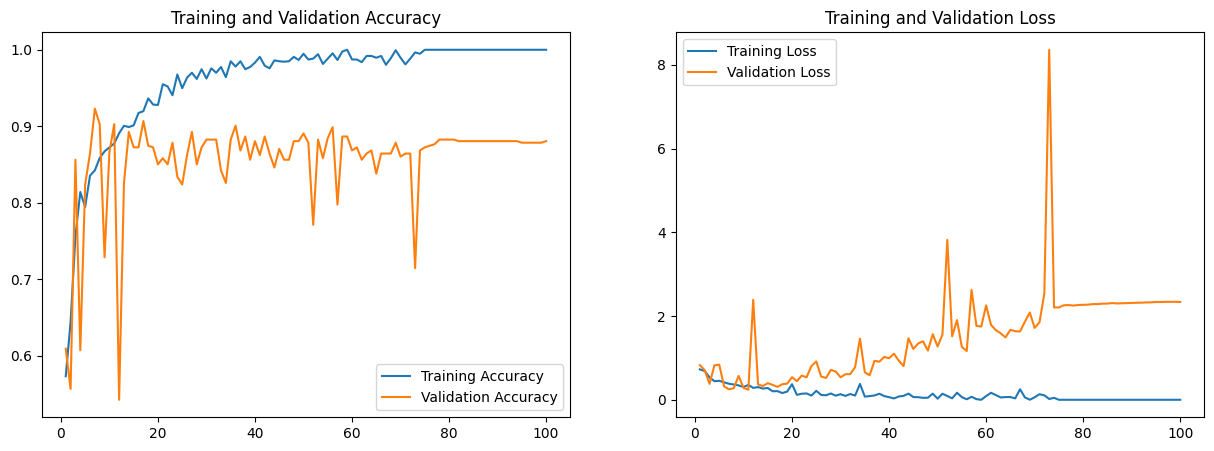

In [8]:
# 훈련 정확도와 손실 그래프 생성
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Analysis - Training & Validation
## 과적합
약 15 Epoch 이후부터 Training과 Validation의 Accuracy, Loss의 차이가 증가

## 불안정
전체적으로 그래프가 크게 진동하는 형태. 특히 Validation Accuracy와 Loss가 특정 Epoch에서 급격히 증가/감소  
약 70 Epoch 이후부터 원만한 형태를 보이나 이는 과적합으로 인한 것으로 추측
  
---

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f"test accuracy: {test_acc}")
print(f"test loss: {test_loss}")

8/8 [==============================] - 1s 36ms/step - loss: 4.0118 - accuracy: 0.8313
test accuracy: 0.8313252925872803
test loss: 4.011761665344238
